In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot

In [7]:
PAMAP_PARQUET  = '../../data/features/pamap_final.parquet'
pamap = pd.read_parquet(PAMAP_PARQUET)
pamap.head()

,0,54,1,2,3,4,5,6,7,8,...,44,45,46,47,48,49,50,51,52,53
0,109,1970-01-01 00:00:31,24,139.0,24.910937,-8.774862,2.921167,2.307146,-8.836571,2.969285,...,0.025054,0.072855,0.327494,-44.677669,-7.026946,3.250370,0.555624,-0.316755,0.718974,-0.268680
1,109,1970-01-01 00:00:32,24,138.0,24.937500,-8.884371,3.639173,2.511493,-8.938693,3.706951,...,0.004657,-0.017115,0.011002,-45.354818,-3.942657,2.595037,0.544582,-0.304127,0.717182,-0.310576
2,109,1970-01-01 00:00:33,24,138.0,24.901250,-7.953692,4.918869,1.920328,-8.051530,4.957867,...,0.251467,-0.058381,-0.167615,-44.676414,-7.139982,3.829399,0.530612,-0.356835,0.695447,-0.324372
3,109,1970-01-01 00:00:34,24,138.0,24.937500,-6.550635,10.524657,0.379089,-6.833505,10.539075,...,-0.264943,-0.043607,0.077041,-41.828461,-15.475105,9.590448,0.485194,-0.476597,0.661950,-0.308362
4,109,1970-01-01 00:00:35,24,138.0,24.937500,-2.638427,8.896337,-2.473392,-2.795023,9.151476,...,0.260470,-0.071397,-0.150778,-39.629503,-19.076338,12.213491,0.469625,-0.529871,0.628705,-0.304908


Columns: \
0: Subject ID \
54: Timestamp \
1: Activity ID
2: heart rate (bpm)

3-15: wrist sensor data \
3: temp (C) \
4-6: 3D acceleration data \
10-12: 3D gyroscope \
13-15: 3D magnetometer

In [8]:
# select only wrist sensor readings and heart rate

selected_columns = [0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16]
column_names = ['SubjectID', 'Timestamp', 'ActivityID', 'HeartRate',
                'Temp', 'AccelerationX', 'AccelerationY', 'AccelerationZ',
                'GyroscopeX', 'GyroscopeY', 'GyroscopeZ',
                'MagnetometerX', 'MagnetometerY', 'MagnetometerZ']

# Selecting and renaming columns
pamap = pamap.iloc[:, selected_columns].copy()
pamap.columns = column_names
pamap.head()

,SubjectID,Timestamp,ActivityID,HeartRate,Temp,AccelerationX,AccelerationY,AccelerationZ,GyroscopeX,GyroscopeY,GyroscopeZ,MagnetometerX,MagnetometerY,MagnetometerZ
0,109,1970-01-01 00:00:31,24,139.0,24.910937,-8.774862,2.921167,2.307146,-0.010192,-0.043375,0.082578,50.871047,3.529991,-16.496216
1,109,1970-01-01 00:00:32,24,138.0,24.937500,-8.884371,3.639173,2.511493,0.055468,-0.006314,-0.138201,49.099500,5.299573,-22.864827
2,109,1970-01-01 00:00:33,24,138.0,24.901250,-7.953692,4.918869,1.920328,1.219631,-0.581240,0.740793,43.733028,-10.409996,-22.783618
3,109,1970-01-01 00:00:34,24,138.0,24.937500,-6.550635,10.524657,0.379089,1.171546,-0.321056,0.531600,6.255278,-32.256336,-32.559351
4,109,1970-01-01 00:00:35,24,138.0,24.937500,-2.638427,8.896337,-2.473392,0.876137,0.265966,0.620075,10.892727,-40.506217,-26.084412


# Cluster Activities

In [9]:
cluster_mapping = {
    0: [1, 2, 3], # 4, 7, 12, 13
    1: [10], # 11
    2: [5, 6, 20, 24] # 16, 17, 18, 19
}

pamap['Cluster'] = pamap['ActivityID'].map({value: key for key, values in cluster_mapping.items() for value in values})
pamap = pamap[pamap['ActivityID'] != 9]
pamap = pamap[pamap['Cluster'].notna()]
pamap['Cluster'] = pamap['Cluster'].astype(int)
# pamap = pamap.drop(columns=['ActivityID']) # drop activity ID column
pamap.head()

,SubjectID,Timestamp,ActivityID,HeartRate,Temp,AccelerationX,AccelerationY,AccelerationZ,GyroscopeX,GyroscopeY,GyroscopeZ,MagnetometerX,MagnetometerY,MagnetometerZ,Cluster
0,109,1970-01-01 00:00:31,24,139.0,24.910937,-8.774862,2.921167,2.307146,-0.010192,-0.043375,0.082578,50.871047,3.529991,-16.496216,2
1,109,1970-01-01 00:00:32,24,138.0,24.937500,-8.884371,3.639173,2.511493,0.055468,-0.006314,-0.138201,49.099500,5.299573,-22.864827,2
2,109,1970-01-01 00:00:33,24,138.0,24.901250,-7.953692,4.918869,1.920328,1.219631,-0.581240,0.740793,43.733028,-10.409996,-22.783618,2
3,109,1970-01-01 00:00:34,24,138.0,24.937500,-6.550635,10.524657,0.379089,1.171546,-0.321056,0.531600,6.255278,-32.256336,-32.559351,2
4,109,1970-01-01 00:00:35,24,138.0,24.937500,-2.638427,8.896337,-2.473392,0.876137,0.265966,0.620075,10.892727,-40.506217,-26.084412,2


In [10]:
pamap.shape

(12412, 15)

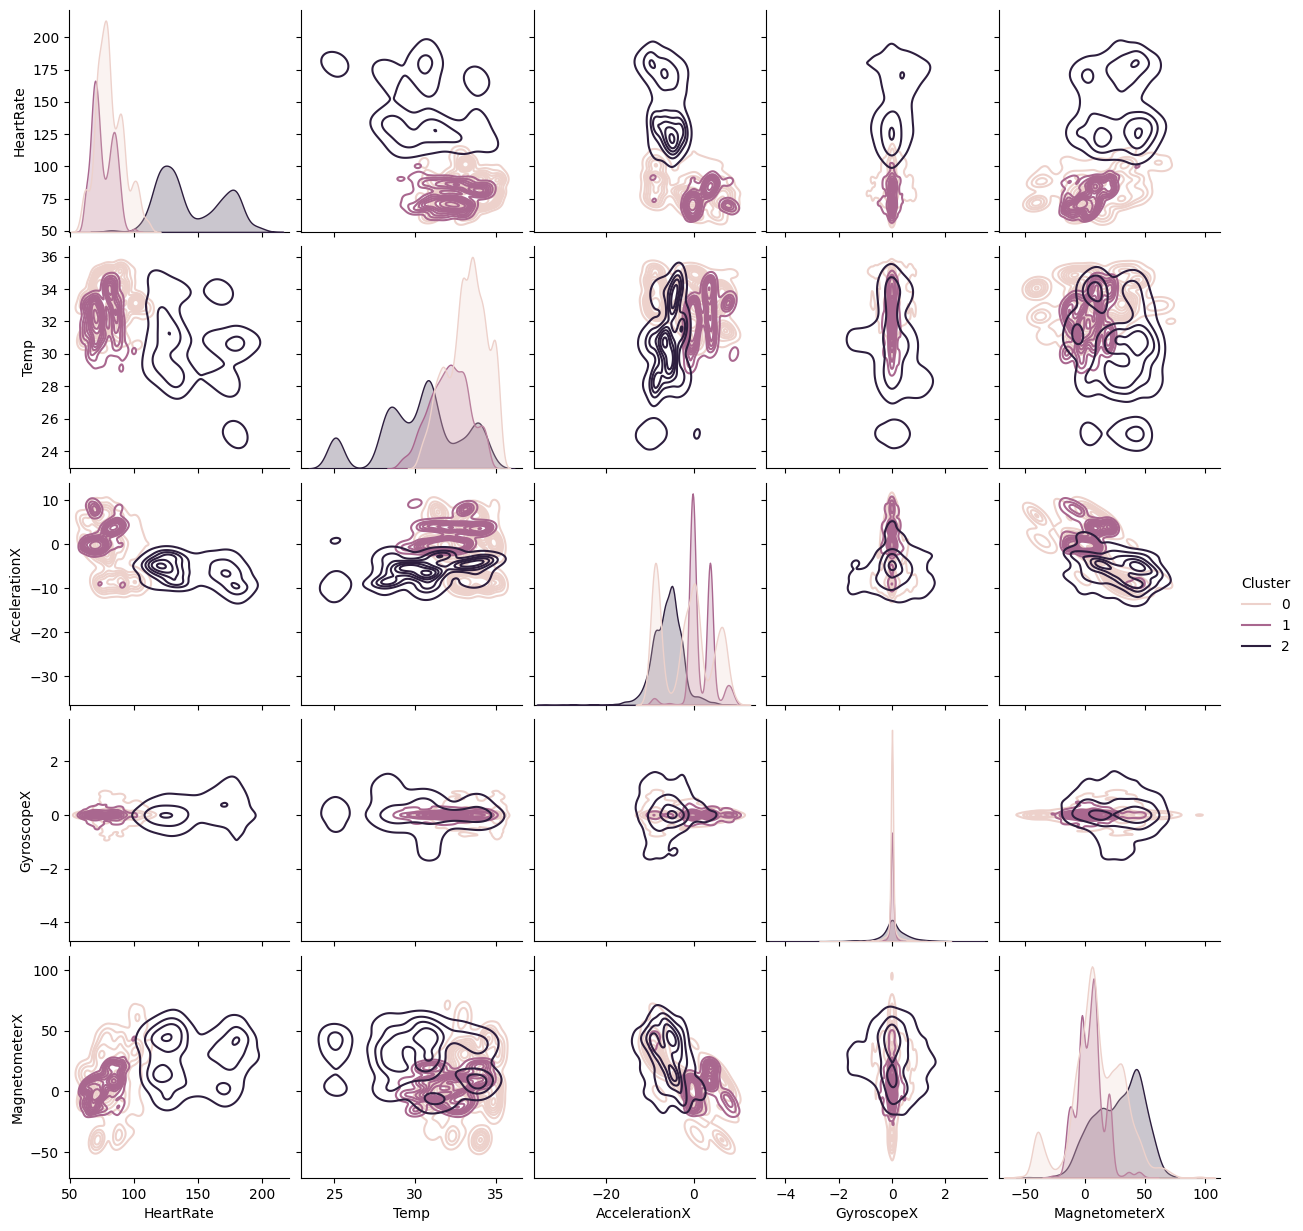

In [45]:
selected_columns = ['Cluster', 'HeartRate','Temp','AccelerationX','GyroscopeX','MagnetometerX']
pamap_copy = pamap[selected_columns].copy()
sns.pairplot(pamap_copy,hue='Cluster',kind='kde') 

# Modeling


In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import TimeSeriesSplit, KFold

In [12]:
X = pamap.drop(['Cluster','SubjectID','Timestamp','ActivityID'], axis=1)
y = pamap['Cluster']
X.head()

,HeartRate,Temp,AccelerationX,AccelerationY,AccelerationZ,GyroscopeX,GyroscopeY,GyroscopeZ,MagnetometerX,MagnetometerY,MagnetometerZ
0,139.0,24.910937,-8.774862,2.921167,2.307146,-0.010192,-0.043375,0.082578,50.871047,3.529991,-16.496216
1,138.0,24.937500,-8.884371,3.639173,2.511493,0.055468,-0.006314,-0.138201,49.099500,5.299573,-22.864827
2,138.0,24.901250,-7.953692,4.918869,1.920328,1.219631,-0.581240,0.740793,43.733028,-10.409996,-22.783618
3,138.0,24.937500,-6.550635,10.524657,0.379089,1.171546,-0.321056,0.531600,6.255278,-32.256336,-32.559351
4,138.0,24.937500,-2.638427,8.896337,-2.473392,0.876137,0.265966,0.620075,10.892727,-40.506217,-26.084412


In [115]:
y.value_counts()

Cluster
0    5697
2    3612
1    3103
Name: count, dtype: int64

In [48]:
# remove highly correlated features : NONE
correlation_matrix = X.corr()
high_corr_threshold = 0.80  # Adjust as needed
correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > high_corr_threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print(f'Correlated Features: {correlated_features}')
# X = X.drop(columns=correlated_features)
# X.head()

Correlated Features: set()


# XGBoost

In [13]:
import xgboost as xgb

In [14]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []


# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)  

# Loop through each fold and train the XGBoost classifier
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    params = {"objective": "multi:softmax", "num_class": 3}

    # Create regression matrices
    dtrain_reg = xgb.DMatrix(X_train, y_train)
    dtest_reg = xgb.DMatrix(X_test)

    n = 100
    model = xgb.train(
        params=params,
        dtrain=dtrain_reg,
        num_boost_round=n,

    )


    y_train_pred = model.predict(dtrain_reg)
    predictions = model.predict(dtest_reg)

    # Evaluate model
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted', zero_division=np.nan)
    recall = recall_score(y_test, predictions, average='weighted', zero_division=np.nan)
    f1 = f1_score(y_test, predictions, average='weighted', zero_division=np.nan)

    # Append metrics for this fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, predictions, labels=range(3))
    confusion_matrices.append(cm)

# Calculate average metrics across all folds
avg_accuracy = np.nanmean(accuracy_scores)
avg_precision = np.nanmean(precision_scores)
avg_recall = np.nanmean(recall_scores)
avg_f1 = np.nanmean(f1_scores)

# Aggregate confusion matrices
aggregated_confusion_matrix_xgb = np.sum(confusion_matrices, axis=0)

print(f"\nAverage Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")


Average Accuracy: 0.7595744680851064
Average Precision: 0.8642497223197745
Average Recall: 0.7595744680851064
Average F1 Score: 0.7422720406430723


In [30]:
aggregated_confusion_matrix_xgb

array([[4248,   95,    0],
       [1276, 1174,    0],
       [ 979,  136, 2432]])

<Axes: >

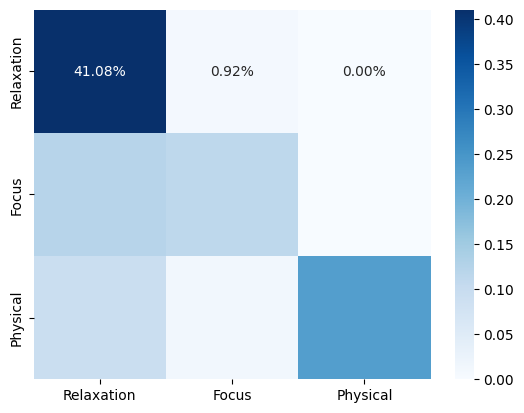

In [31]:
classes = ['Relaxation','Focus','Physical']
sns.heatmap(aggregated_confusion_matrix_xgb/np.sum(aggregated_confusion_matrix_xgb), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=classes, yticklabels=classes)

# ANN

In [ ]:
!pip3 install keras==2.12.0

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical

In [16]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
# Use last 20% of data as test set
split_idx = int(0.8*len(X))

X_test = X.iloc[split_idx:]
X = X.iloc[:split_idx]

y_test = y.iloc[split_idx:]
y = y.iloc[:split_idx]

In [17]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []
num_classes = 3


# Convert labels to one-hot encoding
y_categorical = to_categorical(y)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

# Loop through each fold and train the neural network
for train_index, val_index in tscv.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y_categorical[train_index], y_categorical[val_index]

    # Build a simple dense neural network
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(y_categorical.shape[1], activation='softmax'))  # Use softmax for multiclass classification

    # Compile the model
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Make predictions on the test set
    predictions = np.argmax(model.predict(X_val), axis=1)


    # Evaluate model
    accuracy = accuracy_score(np.argmax(y_val, axis=1), predictions)
    precision = precision_score(np.argmax(y_val, axis=1), predictions, average='weighted', zero_division=np.nan)
    recall = recall_score(np.argmax(y_val, axis=1), predictions, average='weighted', zero_division=np.nan)
    f1 = f1_score(np.argmax(y_val, axis=1), predictions, average='weighted', zero_division=np.nan)

    # Append metrics for this fold
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Calculate confusion matrix
    cm = confusion_matrix(np.argmax(y_val, axis=1), predictions, labels=range(num_classes))
    confusion_matrices.append(cm)


# Calculate average metrics across all folds
avg_accuracy = np.nanmean(accuracy_scores)
avg_precision = np.nanmean(precision_scores)
avg_recall = np.nanmean(recall_scores)
avg_f1 = np.nanmean(f1_scores)

# Aggregate confusion matrices
aggregated_confusion_matrix_nn = np.sum(confusion_matrices, axis=0)

print(f"\nAverage Accuracy: {avg_accuracy}")
print(f"Average Precision: {avg_precision}")
print(f"Average Recall: {avg_recall}")
print(f"Average F1 Score: {avg_f1}")

65/65 [==============================] - 0s 384us/step

Average Accuracy: 0.8007736943907157
Average Precision: 0.9120680520829012
Average Recall: 0.8007736943907157
Average F1 Score: 0.8084031784105388


In [124]:
model.save("pamap_ann")

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x2a687b2e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x2a687b2e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To

INFO:tensorflow:Assets written to: pamap_ann/assets


In [18]:
aggregated_confusion_matrix_nn

array([[3689,  644,   10],
       [ 187, 2263,    0],
       [1101,  118, 2328]])

<Axes: >

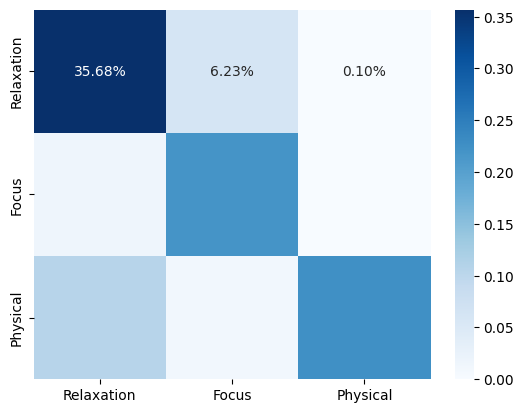

In [29]:
classes = ['Relaxation','Focus','Physical']
sns.heatmap(aggregated_confusion_matrix_nn/np.sum(aggregated_confusion_matrix_nn), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=classes, yticklabels=classes)